In [2]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import keras 


In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [6]:
print(X_train[0].shape)

(32, 32, 3)


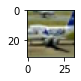

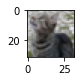

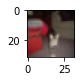

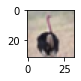

In [7]:
for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()


In [9]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test=X_test/255
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
model = Sequential()

#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
391/391 [==============================] - 586s 1s/step - loss: 1.5783 - accuracy: 0.4205 - val_loss: 1.2002 - val_accuracy: 0.5721
Epoch 2/10
391/391 [==============================] - 596s 2s/step - loss: 1.1049 - accuracy: 0.6094 - val_loss: 0.9204 - val_accuracy: 0.6700
Epoch 3/10
391/391 [==============================] - 581s 1s/step - loss: 0.9288 - accuracy: 0.6744 - val_loss: 0.8269 - val_accuracy: 0.7130
Epoch 4/10
391/391 [==============================] - 587s 2s/step - loss: 0.8134 - accuracy: 0.7175 - val_loss: 0.7619 - val_accuracy: 0.7352
Epoch 5/10
391/391 [==============================] - 581s 1s/step - loss: 0.7324 - accuracy: 0.7432 - val_loss: 0.7182 - val_accuracy: 0.7511
Epoch 6/10
391/391 [==============================] - 574s 1s/step - loss: 0.6681 - accuracy: 0.7669 - val_loss: 0.6769 - val_accuracy: 0.7663
Epoch 7/10
391/391 [==============================] - 573s 1s/step - loss: 0.6033 - accuracy: 0.7875 - val_loss: 0.6749 - val_accuracy: 0.7710

In [11]:
classes = range(0,10)
names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

#make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 201ms/step


In [12]:
print (predictions)

[[6.91448746e-04 1.02019192e-04 1.07235312e-01 2.00251322e-02
  6.80863917e-01 4.66732495e-02 6.69148192e-03 1.36117011e-01
  1.29234034e-03 3.08088027e-04]
 [1.27999415e-03 1.16150116e-03 2.77551971e-02 2.12536633e-01
  3.48811410e-02 2.50432551e-01 4.33555275e-01 3.38808298e-02
  1.88789156e-03 2.62896344e-03]
 [3.64298357e-05 8.70880467e-05 8.08877870e-03 3.85406148e-03
  9.57988668e-05 2.91770045e-03 9.84631538e-01 1.31704466e-04
  5.01407339e-05 1.06683983e-04]
 [5.34878673e-05 1.13559054e-05 9.73238726e-04 9.21715975e-01
  1.99233368e-03 2.18062289e-02 5.28268926e-02 2.48731143e-04
  5.67442366e-05 3.14995559e-04]
 [8.19782020e-09 9.99596298e-01 1.70738651e-12 2.06026342e-12
  1.98315527e-15 8.19226550e-14 9.11923531e-13 2.70953805e-13
  1.07444357e-07 4.03600570e-04]
 [6.21109621e-07 9.98862267e-01 5.21750088e-10 2.11808651e-08
  8.76682407e-12 2.41313258e-09 1.68987153e-08 1.61706395e-11
  1.35020557e-04 1.00212917e-03]
 [5.23708165e-02 1.55237699e-02 1.74162071e-02 4.70738232e

In [13]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
0.99999994
1.0
1.0
1.0
1.0000001
0.9999999
0.99999994


In [14]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 6 6 3 1 1 3 6 8]


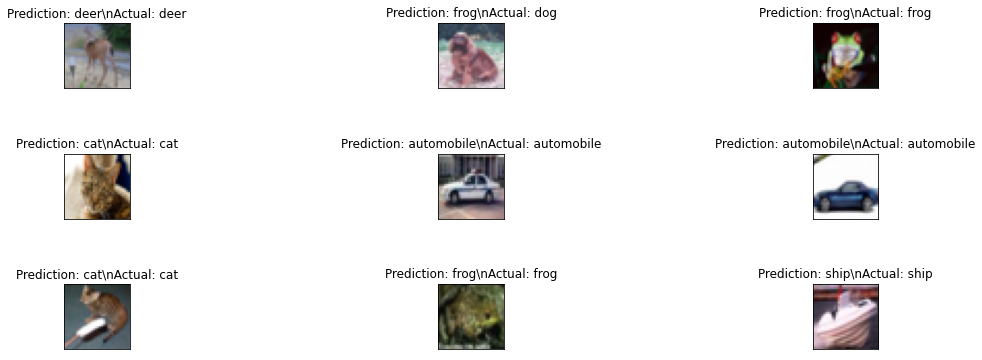

In [15]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)

# show the plot
plt.show()